In [2]:
'''Histograms provide a visual interpretation of numerical data by indicating the number 
of data points that lie within a range of values.  These ranges of values are called 
classes or bins. The frequency of the data that falls in each class is depicted by 
the use of a bar. For images, we can display the frequencies of values for colors.'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dark_horse = cv2.imread('DATA/horse.jpg') #original
show_hourse = cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB) #color corrected

rainbow = cv2.imread('DATA/rainbow.jpg') #original
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB) #color corrected

blue_bricks = cv2.imread('DATA/bricks.jpg') #original
show_blue_bricks = cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB) #color corrected



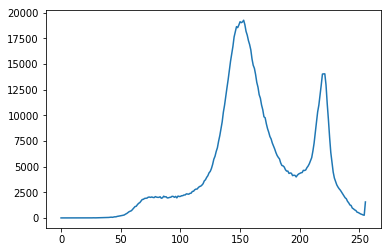

In [3]:
#OnenCV BGR
hist_values = cv2.calcHist([blue_bricks],channels = [0],mask=None, histSize=[256],ranges= [0,256])
plt.plot(hist_values)

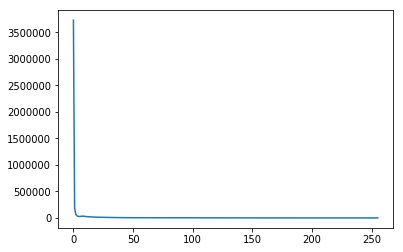

In [4]:
hist_values = cv2.calcHist([dark_horse],channels = [0],mask=None, histSize=[256],ranges= [0,256])
plt.plot(hist_values)

Text(0.5,1,'HISTOGRAM FOR BLUE BRICKS')

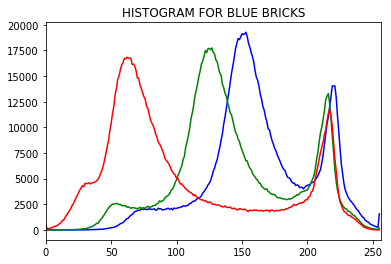

In [6]:
#plotting for all color channels
img = blue_bricks
color = ('b','g','r')

for i, col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR BLUE BRICKS')


Text(0.5,1,'HISTOGRAM FOR DARK HORSE')

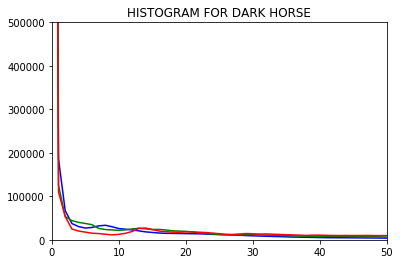

In [8]:
#for horse
img = dark_horse
color = ('b','g','r')

for i, col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,50])
    plt.ylim([0,500000])

plt.title('HISTOGRAM FOR DARK HORSE')

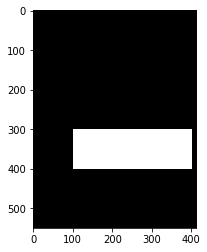

In [20]:
rainbow = cv2.imread('DATA/rainbow.jpg') #original
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB) #color corrected

rainbow_img = rainbow

#grab x and y components
mask = np.zeros(rainbow_img.shape[:2],np.uint8)

#select a region on the mask and set it to white
mask[300:400,100:400] = 255
plt.imshow(mask,cmap='gray')

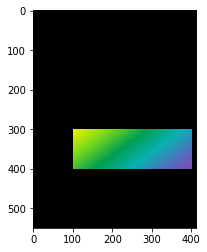

In [21]:
masked_img = cv2.bitwise_and(rainbow_img,rainbow_img, mask = mask)

show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask = mask)
plt.imshow(show_masked_img)


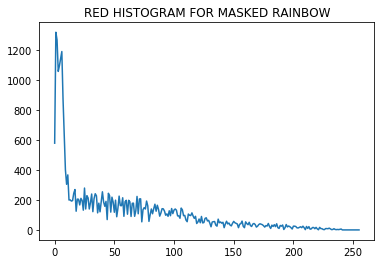

In [23]:
#BGR
histogram_mask_values_red = cv2.calcHist([rainbow],channels = [2],mask = mask,
                                        histSize=[256],ranges=[0,256])
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')
plt.plot(histogram_mask_values_red)

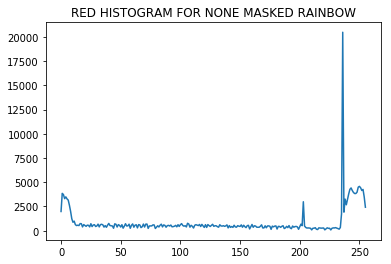

In [25]:
#BGR
histogram_none_mask_values_red = cv2.calcHist([rainbow],channels = [2],mask = None,
                                        histSize=[256],ranges=[0,256])
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')
plt.plot(histogram_none_mask_values_red)

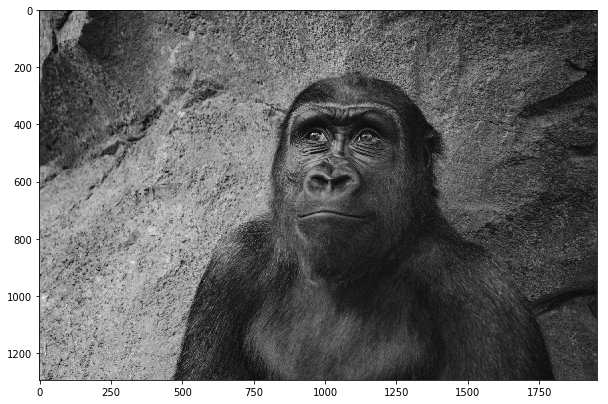

In [31]:
#Histogram Equalization

def show_image(img,cmap=None):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

gorilla = cv2.imread('DATA/gorilla.jpg',0)
show_image(gorilla,cmap='gray')

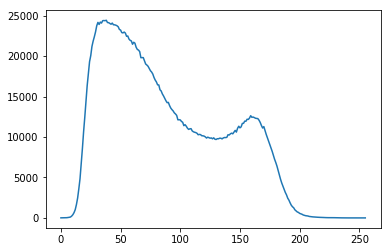

In [35]:
hist_values = cv2.calcHist([gorilla], channels=[0],mask=None,
                          histSize= [256], ranges = [0,256])
plt.plot(hist_values)

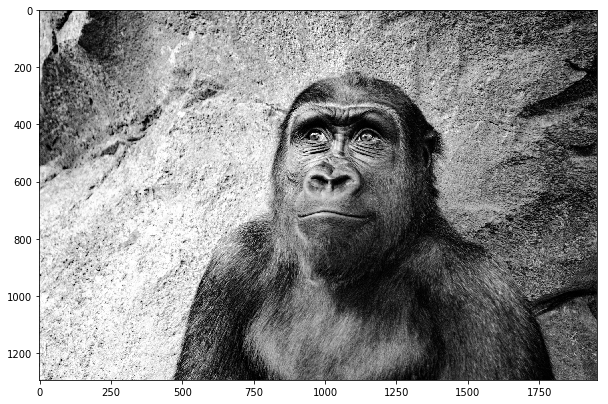

In [36]:
#Histogram Equalization
eq_gorilla = cv2.equalizeHist(gorilla)
show_image(eq_gorilla,cmap='gray')

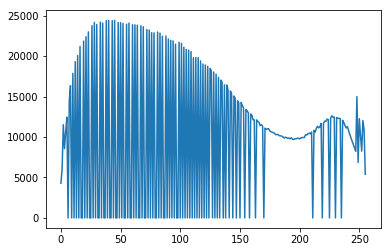

In [37]:
#calculated histogram values of equalized image
hist_values_eq_gorilla = cv2.calcHist([eq_gorilla], channels=[0],mask=None,
                          histSize= [256], ranges = [0,256])
plt.plot(hist_values_eq_gorilla)

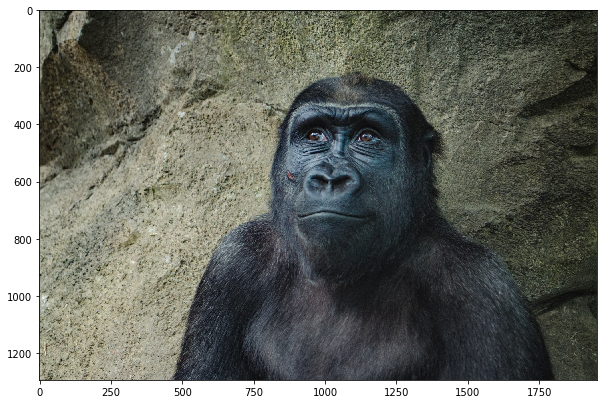

In [38]:
#color version of gorilla

color_gorilla = cv2.imread('DATA/gorilla.jpg')
#convert to RGB
gorilla_rgb = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
show_image(gorilla_rgb)

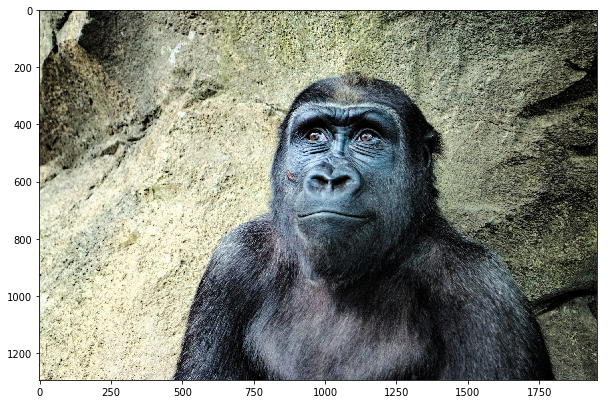

In [43]:
#increase contrast/equalize the image

gorilla_hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

#grab the value channel and equalize it and replace the original values

gorilla_hsv[:,:,2] = cv2.equalizeHist(gorilla_hsv[:,:,2])

eq_color_gorilla = cv2.cvtColor(gorilla_hsv, cv2.COLOR_HSV2RGB)
show_image(eq_color_gorilla)
